In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('FoodBalanceSheets_E_Africa_NOFLAG (1).csv', encoding='ISO-8859-1')

In [4]:
df

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...,...,...,...
60938,181,Zimbabwe,2899,Miscellaneous,5142,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181,Zimbabwe,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181,Zimbabwe,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181,Zimbabwe,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04


In [5]:
df.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000
mean,134.499342,2690.495656,3745.422868,137.831770,138.990488,140.376380,144.927790,148.027664
std,72.651212,146.625825,2217.914615,1588.660769,1625.441821,1662.732983,1695.436448,1735.920219
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2563.000000,674.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2633.000000,5142.000000,0.140000,0.130000,0.130000,0.160000,0.130000
75%,196.000000,2781.000000,5301.000000,9.000000,9.000000,9.000000,10.000000,10.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [8]:
df.duplicated().sum()

0

In [9]:
table=pd.pivot_table(df,index=['Area'],aggfunc={'Y2014':np.sum, 'Y2015':np.sum, 'Y2016':np.sum, 'Y2017':np.sum, 'Y2018':np.sum})
table

,Y2014,Y2015,Y2016,Y2017,Y2018
Area,,,,,
Algeria,313363.33,324048.40,325990.41,325634.27,341712.98
Angola,208584.42,209565.67,214725.32,229154.57,235202.68
Benin,118001.79,108167.13,117954.59,124762.22,124955.70
Botswana,22339.92,23024.85,22970.65,22101.30,23129.07
Burkina Faso,105036.33,102691.22,107687.12,101831.05,112956.72
Cabo Verde,14576.94,14538.93,14569.40,14650.74,14622.60
Cameroon,217595.28,225193.72,231686.36,231998.43,233022.93
Central African Republic,28735.02,28885.34,29389.54,29935.00,30100.57
Chad,65938.17,65835.88,72673.76,71594.68,72282.24


<AxesSubplot:xlabel='Area'>

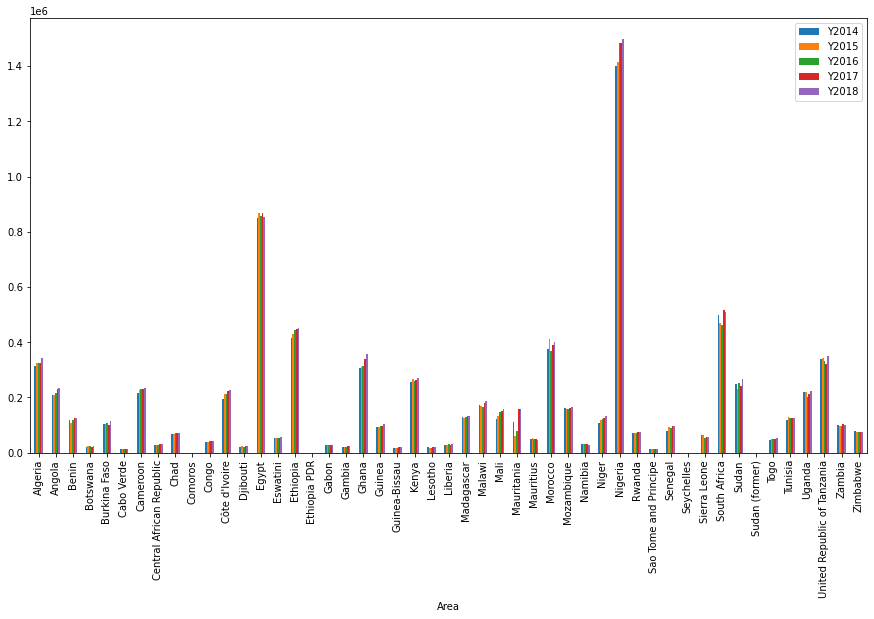

In [10]:
table.plot(kind='bar',figsize=(15,8))

In [14]:
len(df)

57784

In [17]:
df.shape

(57784, 12)

In [18]:
g=df.corr()

In [19]:
g

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005850,0.003624,0.006091,0.005267,0.005246,0.004979,0.005571
Item Code,-0.005850,1.000000,-0.016521,0.021102,0.020226,0.019382,0.020812,0.020527
Element Code,0.003624,-0.016521,1.000000,0.026257,0.025632,0.025080,0.025932,0.025989
Y2014,0.006091,0.021102,0.026257,1.000000,0.994647,0.996081,0.995229,0.994871
Y2015,0.005267,0.020226,0.025632,0.994647,1.000000,0.995738,0.988047,0.988207
Y2016,0.005246,0.019382,0.025080,0.996081,0.995738,1.000000,0.992784,0.992756
Y2017,0.004979,0.020812,0.025932,0.995229,0.988047,0.992784,1.000000,0.998103
Y2018,0.005571,0.020527,0.025989,0.994871,0.988207,0.992756,0.998103,1.000000


In [20]:
table1=pd.pivot_table(df,index=['Item'],aggfunc={'Y2014':np.sum, 'Y2015':np.sum, 'Y2016':np.sum, 'Y2017':np.sum, 'Y2018':np.sum})
table1

,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,
"Alcohol, Non-Food",2329.00,2119.00,2164.00,2299.00,2285.00
Alcoholic Beverages,102391.11,98774.72,96939.75,95572.06,97842.27
Animal Products,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,209460.54,200675.72,183314.22,269617.53,269648.27
Apples and products,9499.23,10559.15,9850.26,10197.90,9640.51
...,...,...,...,...,...
"Vegetables, Other",155038.96,158104.08,156209.90,157749.59,163978.21
Vegetal Products,107145.19,107064.17,106792.72,107655.20,107775.39
Wheat and products,232670.13,234710.51,239377.07,240047.62,242645.19


In [22]:
table3=pd.pivot_table(df,index=['Element'],aggfunc={'Y2014':np.sum, 'Y2015':np.sum, 'Y2016':np.sum, 'Y2017':np.sum, 'Y2018':np.sum})
table3

,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,
Domestic supply quantity,1996714.35,2021472.55,2044822.70,2088178.10,2161167.10
Export Quantity,149683.64,157195.47,151372.46,181691.80,181067.80
Fat supply quantity (g/capita/day),10225.52,10234.82,10101.07,10252.19,10257.21
Feed,216906.89,224998.22,228949.65,223685.68,233441.68
Food,1212296.49,1232283.10,1246953.17,1258820.28,1303806.28
Food supply (kcal/capita/day),454248.00,453365.00,451790.00,454658.00,455241.00
Food supply quantity (kg/capita/yr),49648.98,49341.68,48982.15,48687.16,49055.02
Import Quantity,274037.48,266841.46,286393.78,294212.09,287736.09
Losses,153222.00,155438.00,157787.00,160614.00,163902.00


In [28]:
table4=pd.pivot_table(df,index=['Area','Element'],aggfunc={'Y2014':np.sum, 'Y2015':np.sum, 'Y2016':np.sum, 'Y2017':np.sum, 'Y2018':np.sum})
table4

Y2014     Y2015     Y2016  \
Area     Element                                                                
Algeria  Domestic supply quantity                83755.94  85972.86  87157.61   
         Export Quantity                          1325.64   1101.62   1339.22   
         Fat supply quantity (g/capita/day)        320.19    317.40    309.54   
         Feed                                     9656.04  10308.00   9903.00   
         Food                                    60582.69  61693.49  63081.43   
...                                                   ...       ...       ...   
Zimbabwe Protein supply quantity (g/capita/day)    184.23    175.31    172.72   
         Residuals                                -252.00   -780.00   -882.00   
         Seed                                      144.00    128.00    127.00   
         Stock Variation                          -644.00   -343.00    221.00   
         Total Population - Both sexes           13587.00  13815.00  14030.00   

                                                    Y2017     Y2018  
Area     Element                                                     
Algeria  Domestic supply quantity                86810.42  90023.42  
         Export Quantity                          1492.54    809.54  
         Fat supply quantity (g/capita/day)        320.74    309.09  
         Feed                                     9571.00  10654.00  
         Food                                    62785.33  63736.33  
...                                                   ...       ...  
Zimbabwe Protein supply quantity (g/capita/day)    175.31    176.57  
         Residuals                               -1083.00   -546.00  
         Seed                                      162.00    140.00  
         Stock Variation                           458.00   -447.00  
         Total Population - Both sexes           14237.00  14439.00  

[803 rows x 5 columns]

In [47]:
table4.head(50)

Y2014     Y2015     Y2016  \
Area    Element                                                                
Algeria Domestic supply quantity                83755.94  85972.86  87157.61   
        Export Quantity                          1325.64   1101.62   1339.22   
        Fat supply quantity (g/capita/day)        320.19    317.40    309.54   
        Feed                                     9656.04  10308.00   9903.00   
        Food                                    60582.69  61693.49  63081.43   
        Food supply (kcal/capita/day)           13500.00  13512.00  13483.00   
        Food supply quantity (kg/capita/yr)      1556.45   1552.81   1555.77   
        Import Quantity                         34931.12  37834.91  36720.08   
        Losses                                   7231.00   7471.00   7405.00   
        Other uses (non-food)                    3315.22   3483.37   3400.17   
        Processing                               1776.00   1865.00   1920.00   
        Production                              52534.48  53451.57  54554.75   
        Protein supply quantity (g/capita/day)    379.56    377.37    378.84   
        Residuals                                 552.00    489.00    770.00   
        Seed                                      631.00    657.00    672.00   
        Stock Variation                          2392.00   4233.00   2789.00   
        Total Population - Both sexes           38924.00  39728.00  40551.00   
Angola  Domestic supply quantity                53786.91  55482.91  55719.68   
        Export Quantity                          2716.97   2174.58   3904.89   
        Fat supply quantity (g/capita/day)        248.67    235.76    233.97   
        Feed                                     6908.56   7947.77   7328.43   
        Food                                    34035.32  34545.12  34661.24   
        Food supply (kcal/capita/day)            9672.00   9514.00   9356.00   
        Food supply quantity (kg/capita/yr)      1263.44   1238.86   1201.86   
        Import Quantity                         10185.60   7603.99   6518.47   
        Losses                                   5415.00   5572.00   5874.00   
        Other uses (non-food)                     907.02    884.02    893.00   
        Processing                               5746.00   5772.00   6222.00   
        Production                              48034.27  49891.51  53071.09   
        Protein supply quantity (g/capita/day)    231.66    214.15    201.69   
        Residuals                                   0.00      0.00      0.00   
        Seed                                      771.00    765.00    735.00   
        Stock Variation                          1720.00   -160.00    -38.00   
        Total Population - Both sexes           26942.00  27884.00  28842.00   
        Tourist consumption                         0.00      0.00      0.00   
Benin   Domestic supply quantity                29864.06  27660.67  30650.03   
        Export Quantity                           445.58    579.59    461.66   
        Fat supply quantity (g/capita/day)        201.65    208.02    207.57   
        Feed                                     4560.54   3928.58   4333.78   
        Food                                    15081.52  15171.09  15727.25   
        Food supply (kcal/capita/day)           10957.00  10902.00  10966.00   
        Food supply quantity (kg/capita/yr)      1466.54   1434.96   1446.43   
        Import Quantity                          5925.63   4708.38   5936.21   
        Losses                                   2603.00   2015.00   2610.00   
        Other uses (non-food)                    5184.00   3259.00   4153.00   
        Processing                               1878.00   1789.00   1870.00   
        Production                              26573.99  23855.87  25893.03   
        Protein supply quantity (g/capita/day)    275.28    271.97    266.19   
        Residuals                                 -

In [36]:
lenght=df['Area'].unique()

In [37]:
len(lenght)

49